Импорты для использования YOLO

In [1]:
!uv pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 21.2/107.7 GB disk)


Импорты для исполльзования датасета

In [2]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from io import BytesIO
from datasets import load_dataset

Проверка работы датасета

train.csv:   0%|          | 0.00/27.3M [00:00<?, ?B/s]

val.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/145816 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/37395 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/20867 [00:00<?, ? examples/s]

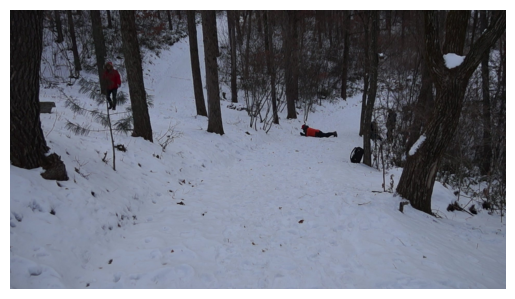

In [7]:
# Load the dataset from Hugging Face
dataset = load_dataset("etri/ForestPersons", split="validation")
sample = dataset[0]

# Image URL
BASE_URL = "https://huggingface.co/datasets/etri/ForestPersons/resolve/main/"
image_url = BASE_URL + sample["file_name"]

# Load the image, Please wait about 30 seconds....
response = requests.get(image_url)
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))

    # Draw image
    fig, ax = plt.subplots()
    ax.imshow(image)
    plt.axis("off")
    plt.show()

else:
    print(f"Failed to load image: {image_url}")

Загрузка модели

In [5]:
model = ultralytics.YOLO("yolo11n.pt")

Работа модели


image 1/1 /content/273_FPV_Person_winter_forest-0083.jpg: 384x640 3 persons, 1 backpack, 176.3ms
Speed: 3.8ms preprocess, 176.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

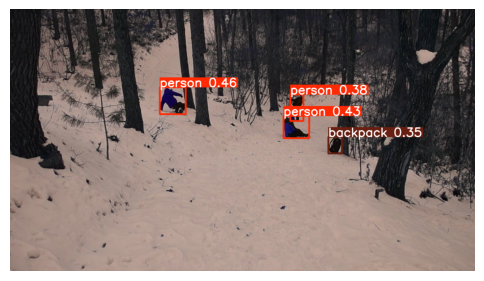

In [22]:
Number = 152


sample = dataset[int(Number)]
image_url = BASE_URL + sample["file_name"]

results = model(image_url)

img = results[0].plot()

plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.axis("off")
plt.show